# Gradient Descent


## Overview:

**How deep learning models learn:**
1. Guess a solution
2. Compute the error (mistakes)
3. Learn from mistakes and modify the parameters

So: we need a mathematical description of the error "landscape" of the problem, and we need a way to find the minimum of the landscape. Calculus comes to rescue.

<p style="display:flex;justify-content: center;align-items:center;">
    <img src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." width=400/>
    <img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Gradient_ascent_%28contour%29.png" width=400/>
</p>

## What about local minima?

**Potential problems with Gradient Descent:**
- Gradient Descent is guaranteed to go "downhill." It is not h=guaranteed to find the correct - or even the best - solution!
- Gradient Descent can go wrong if parameters are not set right for the particular error landscape.
- Error landscapes are impossible to visualize in more than 2D (>2D)

<p style="display:flex;justify-content: center;align-items:center;">
    <img src="https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/09/Neural-network-32-i2tutorials.png" width=400/>
    <img src="https://miro.medium.com/max/1200/1*ZC9qItK9wI0F6BwSVYMQGg.png" width=400/>
</p>

**But does it matter?**
- The success of deep learning, in spite of the "problems" with gradient descent, remains a mystery
- It is possible that there are many good solutions (many equally good local minima). This interpretation is consistent with the huge diversity of weight configurations that produce similar model performance.
- Another possibility is that there are extremely few local minima in high-dimensional space. This interpretation is consistent with the complexity and absurd dimensionality of DL models.
- Gradient Descent will get trapped in a local minima only if that point is a minimum in all dimensions!
- In an extremely high-D space, there might be very few local minima.

**What to do about it?**
- When model performance is good, don't worry about local minima.
- *One possible solution:* Re-train the model many times using different random weights (different starting locations on the loss landscape) and pick the model that does best.
- *Another possible solution:* Increase the dimensionality (complexity) of the model to have fewer local minima.

## Gradient Descent in 1D:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

from IPython import display
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
# function (as a function)
def fx(x):
    return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
    return 6*x - 3

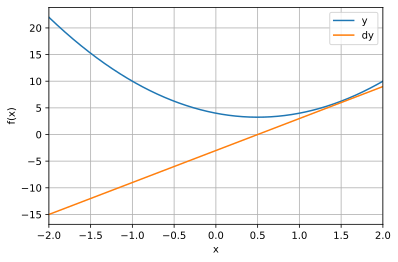

In [3]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [4]:
# random starting point
localmin = np.random.choice(x,1)
print(localmin)

# learning parameters
learning_rate   = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

localmin

[0.344]


array([0.49967944])

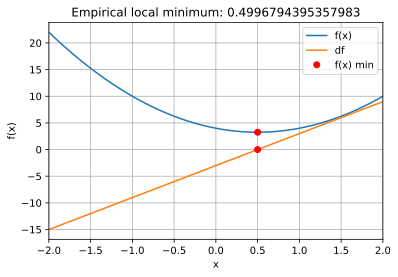

In [5]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

In [6]:
"""
Store the model parameters and outputs on each iteration
"""
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin,grad

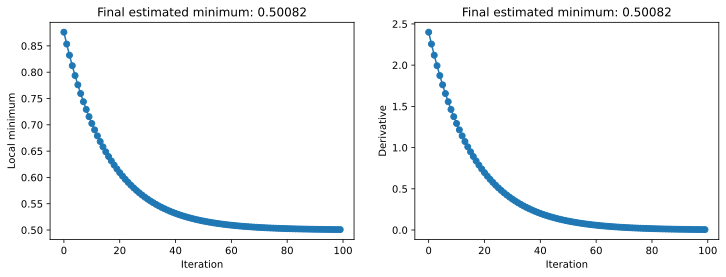

In [7]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(modelparams[:,i],'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [8]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?

### CodeChallenge: Unfortunate Starting Value

**Step 1: Repeat 1D Gradient Descent to find minimum of the following function:**
$$f(x) = cos(2\pi{x}) + x^2, x ∈ {-2, 2}$$
**Step 2: Hard-code a starting value of $x=0$**

In [2]:
# function (as a function)
def fx(x):
    return np.cos(2*np.pi*x) + x**2

# derivative function
def deriv(x):
    return -2*np.pi*np.sin(2*np.pi*x) + 2*x

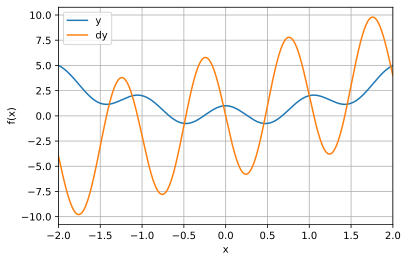

In [3]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [4]:
# random starting point
localmin = np.random.choice(x,1) #np.array([0])#

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

localmin

array([-0.47580245])

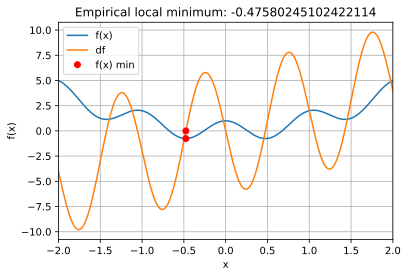

In [5]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

#### Additional Exploration

In [ ]:
# 1) The derivative has a multiplicative factor of 2 in it. Is that constant necessary for the accuracy of the g.d. result?
#    Try removing that '2' from the derivative and see whether the model can still find the minimum. Before running the
#    code, think about what you expect to happen. Does reality match your expectations? Why is (or isn't) that factor necessary?
# 
# 2) What about the factor of '2' inside the np.sin() function? Is that important? Can you get an accurate result if you
#    remove it?
# 
# 3) Try setting the initial value to a small but non-zero number, e.g., .0001 or -.0001. Does that help the solution?

## Gradient Descent in 2D

$$f(x, y) = 3(1-x)^2e^{-x^2-(y+1)^2}-10(\frac{x}{5}-x^3-y^5)e^{-x^2-y^2}-\frac{1}{3}e^{-(x+1)^2-y^2}$$

**Steps:**
- Compute the partial derivatives of the function using sympy and lambdify
- Repeat the gradient descent loop as the last section
- Note that the local minima is (x,y)
- Visualize

In [4]:
# the "peaks" function
def peaks(x,y):
    # expand to a 2D mesh
    x,y = np.meshgrid(x,y)
  
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
        - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
        - 1/3*np.exp(-(x+1)**2 - y**2)
    return z

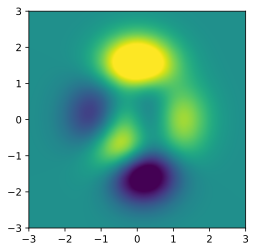

In [5]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [6]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [11]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
    localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
    trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[0.296445553846832 0.320196247666834]
[0.76257456 0.14066451]


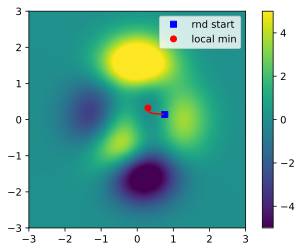

In [12]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

In [ ]:
# 1) Modify the code to force the initial guess to be [0,1.4]. Does the model reach a reasonable local minimum?
# 
# 2) Using the same starting point, change the number of training epochs to 10,000. Does the final solution differ from
#    using 1000 epochs? 
# 
# 3) (Again with the same starting location) Change the learning to .1 (1000 epochs). What do you notice about the trajectory?
#    Try again with the learning rate set to .5, and then to .00001.

### Code Challenge: 2D Gradient Ascent
Modify the 2D gradient descent code to perform gradient ascent. Find the local maxima! There are two ways to solve this
- $localmin = localmin + lr * gradient$
- Flip the sign of the function itself

#### $localmin = localmin + lr * gradient$

In [13]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
    localmin = localmin + learning_rate*grad  # add _ or [:] to change a variable in-place
    trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[1.28568469724130 -0.00484755907559369]
[ 0.86936746 -0.21389498]


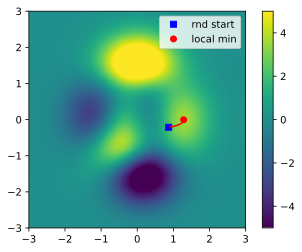

In [14]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

#### Flip the sign of the function:

In [15]:
# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(-sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(-sZ,sy),'sympy' )

df_x(1,1).evalf()

1.07369833656079

In [16]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
    localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
    trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[-0.460024518034386 -0.629196508716801]
[-0.18813709  0.09376558]


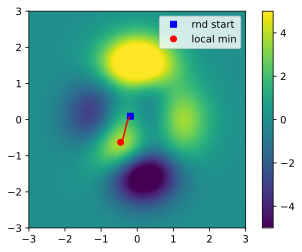

In [17]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

## Parametric Experiments on G.D.

Conduct a one-variable experiment using:
- Initial value
- Learning rate

Conduct a two-variable experiment using:
- Learning rate & training epochs

### Running experiments to understand gradient descent

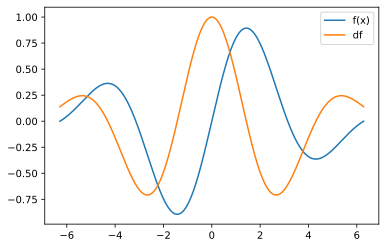

In [18]:
# the function
x  = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05) 

# quick plot for inspection
plt.plot(x,fx, x,df)
plt.legend(['f(x)','df']);

In [19]:
# function (note: over-writing variable names!)
def fx(x):
    return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
    return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

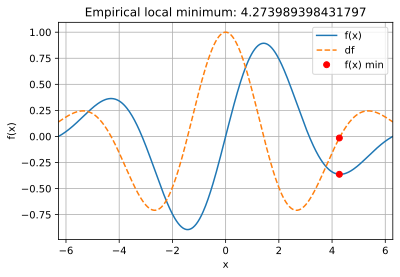

In [20]:
# random starting point
localmin = np.random.choice(x,1) #np.array([6])#

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad



# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

### Run parametric experiments

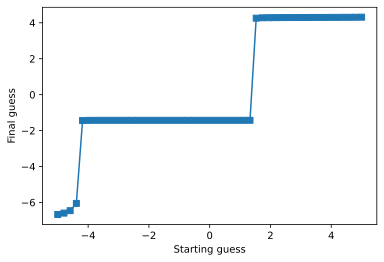

In [21]:
# Experiment 1: systematically varying the starting locations

startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx,localmin in enumerate(startlocs):
  
    # run through training
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate*grad
  
    # store the final guess
    finalres[idx] = localmin


# plot the results
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

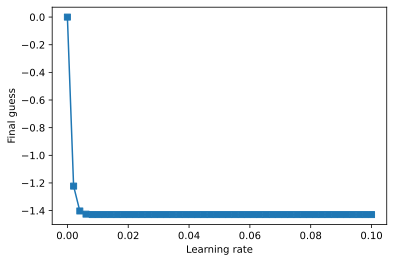

In [22]:
# Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx,learningRate in enumerate(learningrates):
  
    # force starting guess to 0
    localmin = 0

    # run through training
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learningRate*grad
  
    # store the final guess
    finalres[idx] = localmin


plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

In [23]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))



# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

    # loop over training epochs
    for Eidx,trainEpochs in enumerate(training_epochs):
  
        # run through training (again fixing starting location)
        localmin = 0
        for i in range(int(trainEpochs)):
            grad = deriv(localmin)
            localmin = localmin - learningRate*grad
    
        # store the final guess
        finalres[Lidx,Eidx] = localmin

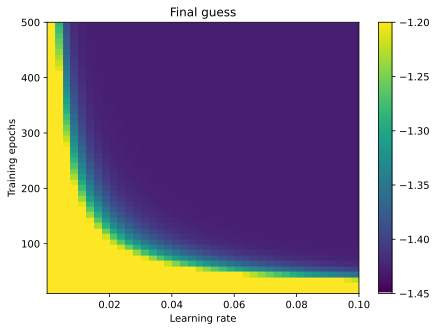

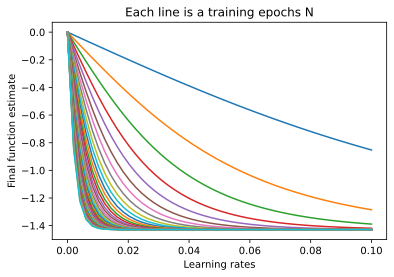

In [25]:
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

In [ ]:
# 1) In experiment 3, set the starting location to be 1.6. Re-run the experiment and the image. You'll need to re-adjust 
#    the figure color limits; check the line plots at the top of the code to determine a useful color range. Does the new
#    starting value change your conclusions about the interaction between learning rate and training epochs?
# 
# 2) In the same experiment, now change the starting location to be random (use code: np.random.choice(x,1)). How do these
#    results look? Are you surprised? Are the results of this experiment still interpretable and what does this tell you 
#    about running experiments in DL?

### Coding Challenge: Fixed vs Dynamic Learning Rate

Think about how to change the learning rate
- Time (training epoch)
- Derivative
- Loss
- Current local minimum value

#### Function & It's Derivative

In [26]:
# define a range for x
x = np.linspace(-2,2,2001)

# function (as a function)
def fx(x):
    return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
    return 6*x - 3

#### G.D. using a Fixed Learning Rate

In [27]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
    # compute gradient
    grad = deriv(localmin)

    # non-adaptive learning rate
    lr = learning_rate

    # update parameter according to g.d.
    localmin = localmin - lr*grad

    # store the parameters
    modelparamsFixed[i,:] = localmin,grad, lr

#### G.D. using a Gradient-Based Learning Rate

In [28]:
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
    # compute gradient
    grad = deriv(localmin)

    # adapt the learning rate according to the gradient
    lr = learning_rate * np.abs(grad)

    # update parameter according to g.d.
    localmin = localmin - lr * grad

    # store the parameters
    modelparamsGrad[i,:] = localmin, grad, lr

####  G.D. using a Time-Based Learning Rate

In [29]:
# redefine parameters
learning_rate = .1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
    grad = deriv(localmin)
    lr = learning_rate * (1-(i+1)/training_epochs)
    localmin = localmin - lr * grad
    modelparamsTime[i,:] = localmin, grad, lr

####  Plot the Results

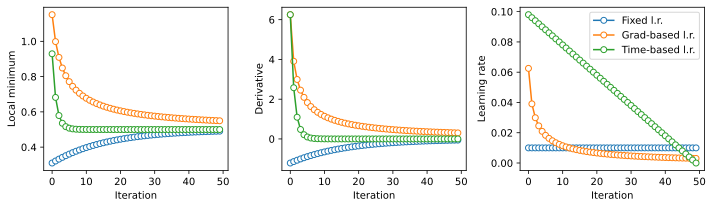

In [30]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
    ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()

In [ ]:
# 1) Change the initial learning rate in the "time" experiment from .1 to .01. Do you still reach the same conclusion that
#    dynamic learning rates are better than a fixed learning rate?
# 
# 2) Compute the average of all time-based learning rates (see variable 'modelparamsTime'). Next, replace the fixed 
#    learning rate with the average over all dynamic learning rates. How does that affect the model's performance?
# 
# 3) Going back to the original code (without the modifications above), you saw that the fixed learning rate model didn't
#    get to the same local minimum. What happens if you increase the number of training epochs from 50 to 500? Does that 
#    improve the situation, and what does that tell you about the relationship between learning rate and training epochs?
# 
# 4) The code here initializes the starting value as a random number, which will differ for each learning rate method.
#    Is that appropriate or inappropriate for this experiment? Why? Change the code so that the starting value is the
#    same for all three learning rate models.

#### Summary & Thoughts

1. `Training epoch`: Good method, often done in blocks. But unrelated to model performance/accuracy. This method is called "learning rate decay".
2. `Derivative`: Adaptive to the problem. Requires additional parameters and appropriate scaling. This method is incorporated into RMSprop and Adam optimizers.
3. `Loss`: Adaptive to the problem. Works only when loss is in range of [0, 1] (scaling possible)
4. `Current local minimum value`: Adaptive to the problem. Too many assumptions for this generally to be a good idea.

## Vanishing & Exploding Gradients:
<p>
    <img src="./images/image-1.jpeg" width=550 style="border:2px solid white;border-radius:10px"/>
</p>

**How to minimize Gradient Problems:**
- Use models with few hidden layers.
- Use activation functions that do not saturate (e.g., ReLU)
- Apply weight normalization
- Pre-train networks using autoencoders
- Use regularization techniques like batch normalization, dropout and weight decay
- Use architechtures like residual networks ("resnet")